In [ ]:
# This program gives probability of having a heart attack

In [ ]:
# load libraries
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# load the data
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
# store the dataset
df = pd.read_csv('heart.csv')

# print the first 5 rows of data
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# show the data shape
df.shape

(303, 14)

In [ ]:
# check for duplicates if any & remove them
df.drop_duplicates(inplace = True)
df.shape

(302, 14)

In [ ]:
# convert the data into an array
dataset = df.values
dataset

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

In [ ]:
# get all of the rows from the first eight columns of the dataset
X = dataset[:,0:8]
y = dataset[:,8]

In [ ]:
# process the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.70833333, 1.        , 1.        , ..., 1.        , 0.        ,
        0.60305344],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.5       ,
        0.88549618],
       [0.25      , 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.77099237],
       ...,
       [0.8125    , 1.        , 0.        , ..., 1.        , 0.5       ,
        0.53435115],
       [0.58333333, 1.        , 0.        , ..., 0.        , 0.5       ,
        0.33587786],
       [0.58333333, 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.78625954]])

In [ ]:
# split the data into 80% training & 20% testing
X_train, X_test,y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state = 4)

In [ ]:
# build the model
model = Sequential([
    Dense(12, activation='relu', input_shape=(8,)),
    Dense(15, activation='relu'),
    Dense(1, activation = 'sigmoid')

]
)

In [ ]:
# compile the model
model.compile(
    optimizer = 'sgd', 
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
print('X_train shape: ',X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (241, 8)
X_test shape:  (61, 8)


In [ ]:
# train the model
hist = model.fit(X_train, y_train, batch_size = 57, epochs = 1000, validation_split=0.2 )

Epoch 1/1000
4/4 [==============================] - 14s 161ms/step - loss: 0.7144 - accuracy: 0.3294 - val_loss: 0.6882 - val_accuracy: 0.4898
Epoch 2/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.7162 - accuracy: 0.3164 - val_loss: 0.6865 - val_accuracy: 0.5102
Epoch 3/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.7079 - accuracy: 0.3440 - val_loss: 0.6848 - val_accuracy: 0.5510
Epoch 4/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7025 - accuracy: 0.3879 - val_loss: 0.6833 - val_accuracy: 0.5918
Epoch 5/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7008 - accuracy: 0.4095 - val_loss: 0.6818 - val_accuracy: 0.5918
Epoch 6/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.6952 - accuracy: 0.4757 - val_loss: 0.6806 - val_accuracy: 0.6122
Epoch 7/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.6927 - accuracy: 0.5357 - val_loss: 0.6795 - val_accuracy: 0.6531
Epoch 8/1000
4/4

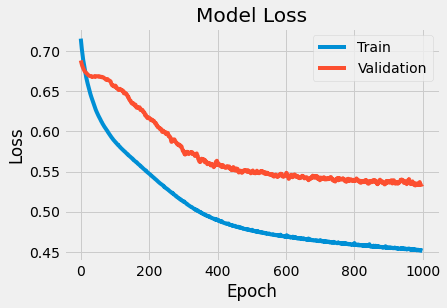

In [ ]:
# visualize the training loss & the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper right')
plt.show()

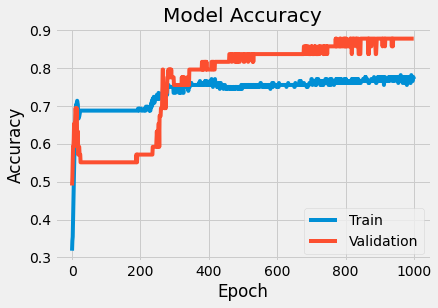

In [ ]:
# visualize the training accuracy & the validation accuracy to see if the model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'lower right')
plt.show()

In [ ]:
# make a prediction & print the actual values
prediction = model.predict(X_test)
#prediction = [1 if y>=0.5 else 0 for y in prediction]
print(prediction)
print(y_test)

[[0.4096545 ]
 [0.18411508]
 [0.40186656]
 [0.3828385 ]
 [0.42590463]
 [0.10872281]
 [0.22211927]
 [0.41416457]
 [0.04218116]
 [0.44540837]
 [0.0523693 ]
 [0.35922933]
 [0.16562024]
 [0.0843052 ]
 [0.21952403]
 [0.62902   ]
 [0.83310646]
 [0.0182617 ]
 [0.0384241 ]
 [0.568248  ]
 [0.31110948]
 [0.10789713]
 [0.32558417]
 [0.05575502]
 [0.86336374]
 [0.6602174 ]
 [0.08412325]
 [0.05163088]
 [0.5536897 ]
 [0.08912519]
 [0.4471872 ]
 [0.07885969]
 [0.6108403 ]
 [0.48480663]
 [0.16837472]
 [0.12933928]
 [0.06404653]
 [0.06111488]
 [0.37202895]
 [0.08872691]
 [0.04070571]
 [0.04100451]
 [0.90336466]
 [0.0619773 ]
 [0.39044785]
 [0.17323378]
 [0.5314923 ]
 [0.05881557]
 [0.6391555 ]
 [0.0306634 ]
 [0.03419384]
 [0.6378417 ]
 [0.16199964]
 [0.5895677 ]
 [0.33781582]
 [0.04260314]
 [0.41867822]
 [0.6006994 ]
 [0.06690618]
 [0.11798438]
 [0.10072982]]
[1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.

In [ ]:
# evaluate the model on the training dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = model.predict(X_train)
pred = [1 if y>=0.5 else 0 for y in pred]
print(classification_report(y_train, pred))
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       159
         1.0       0.73      0.63      0.68        82

    accuracy                           0.80       241
   macro avg       0.78      0.76      0.77       241
weighted avg       0.79      0.80      0.79       241

Confusion Matrix: 
 [[140  19]
 [ 30  52]]

Accuracy:  0.7966804979253111
